## Хоча ми маємо датасет розміром 100 МБ, який би вмістився в RAM, в цій лабораторній я вирішив поекспериментувати з pipeline-інгом даних.

Тобто дані надходитимуть потоково з диску, по батчам, за допомогою функції make_csv_dataset. Такий підхід унеможливлює деякі операції попередньої обробки, наприклад видалення окремих рядків: видалення "унікальних" символів (що зустрічаються лише в одному чи двух шрифтах), дублікатів (які ідентичні в різних шрифтах) тощо, отже результати можуть бути менш ніж задовільними. ~~В наступній лабораторній такий експериментальний підхід використовуватися не буде.~~

In [ ]:
!rm *.csv
!curl -L https://github.com/gardenappl/uni/blob/main/semesterm1/nn/lecture7/fonts.zip?raw=true -o fonts.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  152M  100  152M    0     0   155M      0 --:--:-- --:--:-- --:--:--  255M


In [ ]:
!unzip fonts.zip

Archive:  fonts.zip
  inflating: AGENCY.csv              
  inflating: ARIAL.csv               
  inflating: BAITI.csv               
  inflating: BANKGOTHIC.csv          
  inflating: BASKERVILLE.csv         
  inflating: BAUHAUS.csv             
  inflating: BELL.csv                
  inflating: BERLIN.csv              
  inflating: BERNARD.csv             
  inflating: BITSTREAMVERA.csv       
  inflating: BLACKADDER.csv          
  inflating: BODONI.csv              
  inflating: BOOK.csv                
  inflating: BOOKMAN.csv             
  inflating: BRADLEY.csv             
  inflating: BRITANNIC.csv           
  inflating: BROADWAY.csv            
  inflating: BRUSH.csv               
  inflating: BUXTON.csv              
  inflating: CAARD.csv               
  inflating: CALIBRI.csv             
  inflating: CALIFORNIAN.csv         
  inflating: CALISTO.csv             
  inflating: CAMBRIA.csv             
  inflating: CANDARA.csv             
  inflating: CASTELLAR.csv    

Кількість файлів:

In [ ]:
!ls *.csv | wc -l

153


Кількість рядків:

In [ ]:
!wc *.csv -l

      1005 AGENCY.csv
     26238 ARIAL.csv
      1649 BAITI.csv
      2241 BANKGOTHIC.csv
       957 BASKERVILLE.csv
       953 BAUHAUS.csv
       957 BELL.csv
      2013 BERLIN.csv
       957 BERNARD.csv
      2297 BITSTREAMVERA.csv
       953 BLACKADDER.csv
      3965 BODONI.csv
      2669 BOOK.csv
      2670 BOOKMAN.csv
       981 BRADLEY.csv
       953 BRITANNIC.csv
       957 BROADWAY.csv
       957 BRUSH.csv
      2333 BUXTON.csv
      1697 CAARD.csv
     19069 CALIBRI.csv
      1005 CALIFORNIAN.csv
       966 CALISTO.csv
      9599 CAMBRIA.csv
      3025 CANDARA.csv
      1057 CASTELLAR.csv
       957 CENTAUR.csv
      7995 CENTURY.csv
       953 CHILLER.csv
      1865 CITYBLUEPRINT.csv
      2389 COMIC.csv
      1121 COMMERCIALSCRIPT.csv
      1641 COMPLEX.csv
      8965 CONSOLAS.csv
      3019 CONSTANTIA.csv
       957 COOPER.csv
      1913 COPPERPLATE.csv
      3025 CORBEL.csv
      1841 COUNTRYBLUEPRINT.csv
     12230 COURIER.csv
     29450 CREDITCARD.csv
       981 CURLZ.cs

[https://www.tensorflow.org/tutorials/load_data/csv#multiple_files](https://www.tensorflow.org/tutorials/load_data/csv#multiple_files)

In [ ]:
import numpy as np
import tensorflow as tf

BATCH_SIZE = 100

In [ ]:
fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern = "*.csv",
    batch_size=BATCH_SIZE,
    num_epochs=1,
    shuffle=False,
    num_parallel_reads=155)

Перший батч:

In [ ]:
for features in fonts_ds.take(1):
  for i, (name, value) in enumerate(features.items()):
    if i>15:
      break
    print(f"{name:20s}: {value}")
print('...')
print(f"[total: {len(features)} features]")


font                : [b'AGENCY' b'ARIAL' b'BAITI' b'BANKGOTHIC' b'BASKERVILLE' b'BAUHAUS'
 b'BELL' b'BERLIN' b'BERNARD' b'BITSTREAMVERA' b'BLACKADDER' b'BODONI'
 b'BOOK' b'BOOKMAN' b'BRADLEY' b'BRITANNIC' b'BROADWAY' b'BRUSH' b'BUXTON'
 b'CAARD' b'CALIBRI' b'CALIFORNIAN' b'CALISTO' b'CAMBRIA' b'CANDARA'
 b'CASTELLAR' b'CENTAUR' b'CENTURY' b'CHILLER' b'CITYBLUEPRINT' b'COMIC'
 b'COMMERCIALSCRIPT' b'COMPLEX' b'CONSOLAS' b'CONSTANTIA' b'COOPER'
 b'COPPERPLATE' b'CORBEL' b'COUNTRYBLUEPRINT' b'COURIER' b'CREDITCARD'
 b'CURLZ' b'DUTCH801' b'E13B' b'EBRIMA' b'EDWARDIAN' b'ELEPHANT'
 b'ENGLISH' b'ENGRAVERS' b'ERAS' b'EUROROMAN' b'FELIX TITLING'
 b'FOOTLIGHT' b'FORTE' b'FRANKLIN' b'FREESTYLE' b'FRENCH' b'GABRIOLA'
 b'GADUGI' b'GARAMOND' b'GEORGIA' b'GIGI' b'GILL' b'GLOUCESTER' b'GOTHICE'
 b'GOUDY' b'GUNPLAY' b'HAETTENSCHWEILER' b'HANDPRINT' b'HARLOW'
 b'HARRINGTON' b'HIGH TOWER' b'HIMALAYA' b'IMPACT' b'IMPRINT' b'INFORMAL'
 b'ISOC' b'ITALIC' b'JAVANESE' b'JOKERMAN' b'JUICE' b'KRISTEN' b'KUNSTL

In [ ]:
import re

def get_columns(features):
  print(features)
  image = [None]*400

  for name, value in features.items():
    match = re.match('r(\d+)c(\d+)', name)
    if match:
      image[int(match.group(1))*20+int(match.group(2))] = value

  image = tf.stack(image, axis=0)

  print(image)

  return { 'image': image, 'char': features['m_label'], 'font': features['font'] }

**Перевіримо перетворення зображень, і співставимо їх з символом. Далі працюватимемо тільки з шрифтами, а не з символами.**

In [ ]:
ds = fonts_ds.map(get_columns)

OrderedDict([('font', <tf.Tensor 'args_0:0' shape=(None,) dtype=string>), ('fontVariant', <tf.Tensor 'args_1:0' shape=(None,) dtype=string>), ('m_label', <tf.Tensor 'args_4:0' shape=(None,) dtype=int32>), ('strength', <tf.Tensor 'args_410:0' shape=(None,) dtype=float32>), ('italic', <tf.Tensor 'args_3:0' shape=(None,) dtype=int32>), ('orientation', <tf.Tensor 'args_7:0' shape=(None,) dtype=float32>), ('m_top', <tf.Tensor 'args_6:0' shape=(None,) dtype=int32>), ('m_left', <tf.Tensor 'args_5:0' shape=(None,) dtype=int32>), ('originalH', <tf.Tensor 'args_8:0' shape=(None,) dtype=int32>), ('originalW', <tf.Tensor 'args_9:0' shape=(None,) dtype=int32>), ('h', <tf.Tensor 'args_2:0' shape=(None,) dtype=int32>), ('w', <tf.Tensor 'args_411:0' shape=(None,) dtype=int32>), ('r0c0', <tf.Tensor 'args_10:0' shape=(None,) dtype=int32>), ('r0c1', <tf.Tensor 'args_11:0' shape=(None,) dtype=int32>), ('r0c2', <tf.Tensor 'args_22:0' shape=(None,) dtype=int32>), ('r0c3', <tf.Tensor 'args_23:0' shape=(None,

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65311 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65311 missing from current font.
  font.set_text(s, 0, flags=flags)


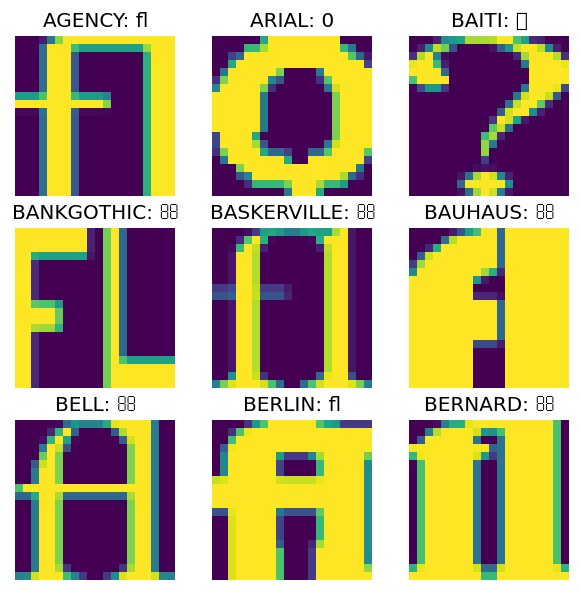

In [ ]:
from matplotlib import pyplot as plt

for features in ds.take(1):
  plt.figure(figsize=(6,6), dpi=120)
  for n in range(9):
    plt.subplot(3,3,n+1)
    plt.imshow(tf.reshape(features['image'][...,n], (20, 20)))
    char = chr(features['char'][n])
    font = features['font'][n].numpy().decode('UTF-8')
    plt.title(f"{font}: {char}")
    plt.axis('off')

In [ ]:
import keras.layers as L
import keras.models as M

In [ ]:
def get_category_encoding_layer(name, dataset, max_tokens=None):
  index = L.StringLookup(max_tokens=max_tokens)

  # Prepare a `tf.data.Dataset` that only yields the feature.
  feature_ds = dataset.map(lambda x: x[name])

  # Learn the set of possible values and assign them a fixed integer index.
  index.adapt(feature_ds)

  # Encode the integer indices.
  encoder = L.CategoryEncoding(num_tokens=index.vocabulary_size())

  # Apply one-hot encoding to the indices. The lambda function captures the
  # layer, so you can use them, or include them in the Keras Functional model later.
  return lambda feature: encoder(index(feature)), index

Пройдемо один раз по датасету щоб дізнатися всі категорії

In [ ]:
encoding_layer, encoding_index = get_category_encoding_layer(name='font', dataset=ds)

In [ ]:
def encode(fonts):
  return tf.map_fn(encoding_layer, tf.constant(fonts), fn_output_signature=tf.float32)
encode(['ARIAL', 'IMPACT'])

<tf.Tensor: shape=(2, 154), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0

In [ ]:
# convert to set of input-output tuples
def prepare(f):
  flat_images = []
  for i in range(400):
    flat_images.append(f['image'][i] / 255)
  return (tf.stack(flat_images, axis=1), tf.map_fn(encoding_layer, f['font'], fn_output_signature=tf.float32))
prepared_ds = ds.map(prepare)

In [ ]:
# test_ds, other_ds = tf.keras.utils.split_dataset(prepared_ds, left_side=50000) # needs TF 2.10.0
train_ds = prepared_ds.enumerate().filter(lambda i, x: i % 10 < 8).map(lambda _, x: x)
val_ds = prepared_ds.enumerate().filter(lambda i, x: i % 10 == 8).map(lambda _, x: x)
test_ds = prepared_ds.enumerate().filter(lambda i, x: i % 10 == 9).map(lambda _, x: x)

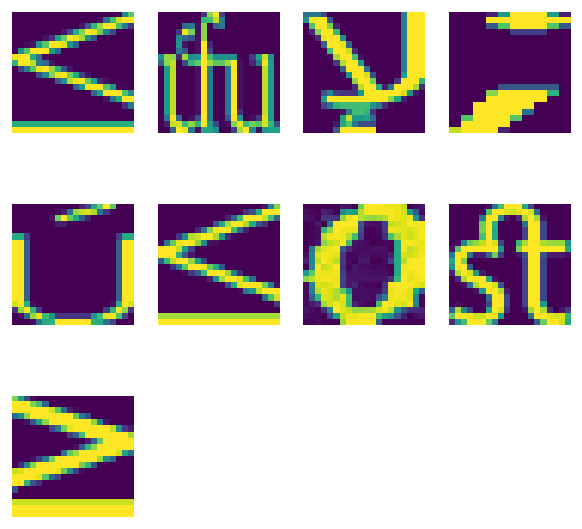

tf.Tensor(
[[0.00392157 0.00392157 0.00392157 ... 1.         1.         1.        ]
 [0.00392157 0.00392157 0.00392157 ... 0.5254902  0.58431373 0.58431373]
 [0.38823529 0.38823529 0.38823529 ... 0.00392157 0.00392157 0.00392157]
 ...
 [0.00392157 0.00392157 0.00392157 ... 0.44705882 0.44705882 0.44705882]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.00392157 0.00392157 0.03529412 ... 0.18431373 0.01568627 0.00392157]], shape=(100, 400), dtype=float64)
tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(100, 154), dtype=float32)
0 tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0

In [ ]:
font_counts = None
i = 0
features = test_ds.take(500)
for image, font in features:
  if i == 0:
    plt.figure(figsize=(6,6), dpi=120)
    for n in range(9):
      plt.subplot(3,4,n+1)
      plt.imshow(tf.reshape(image[n], (20, 20)))
      plt.axis('off')
    plt.show()
    print(image)
    print(font)
  for f in font:
    if font_counts is None: font_counts = f
    else: font_counts += f
    if i % 1000 == 0:
      # print(i, f)
      print(i, font_counts)
    i += 1
print(sum(font_counts))

Ми підтвердили, що в test_ds попали елементи з усіх категорій.

In [ ]:
shuffled_train_ds = train_ds.shuffle(10000, reshuffle_each_iteration=True)

In [ ]:
model = M.Sequential()
model.add(L.Dense(400, input_dim=400, activation="gelu"))
model.add(L.Dense(800, activation="gelu"))
model.add(L.Dense(200, activation="gelu"))
model.add(L.Dense(154, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 400)               160400    
                                                                 
 dense_5 (Dense)             (None, 800)               320800    
                                                                 
 dense_6 (Dense)             (None, 200)               160200    
                                                                 
 dense_7 (Dense)             (None, 154)               30954     
                                                                 
Total params: 672,354
Trainable params: 672,354
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(shuffled_train_ds, validation_data=val_ds, epochs=10, verbose=1)
scores = model.evaluate(test_ds, verbose=1)

Epoch 1/10
6663/6663 [==============================] - 832s 78ms/step - loss: 2.9332 - accuracy: 0.3645 - val_loss: 3.3941 - val_accuracy: 0.2902
Epoch 2/10
6663/6663 [==============================] - 750s 66ms/step - loss: 2.7175 - accuracy: 0.3994 - val_loss: 2.6277 - val_accuracy: 0.4190
Epoch 3/10
6663/6663 [==============================] - 737s 66ms/step - loss: 2.5743 - accuracy: 0.4216 - val_loss: 2.4911 - val_accuracy: 0.4373
Epoch 4/10
6663/6663 [==============================] - 746s 66ms/step - loss: 2.4644 - accuracy: 0.4397 - val_loss: 2.4027 - val_accuracy: 0.4493
Epoch 5/10
6663/6663 [==============================] - 736s 66ms/step - loss: 2.3750 - accuracy: 0.4535 - val_loss: 2.3332 - val_accuracy: 0.4614
Epoch 6/10
6663/6663 [==============================] - 744s 66ms/step - loss: 2.2967 - accuracy: 0.4663 - val_loss: 2.2620 - val_accuracy: 0.4739
Epoch 7/10
6663/6663 [==============================] - 742s 66ms/step - loss: 2.2286 - accuracy: 0.4772 - val_loss: 2

In [ ]:
decoding_index = L.StringLookup(vocabulary=encoding_index.get_vocabulary(), invert=True)

In [ ]:
def decode(font, index):
  return index(np.argmax(font)).numpy().decode("UTF-8")

In [ ]:
vis_ds = prepared_ds.take(1)

1/1 [==============================] - 0s 20ms/step


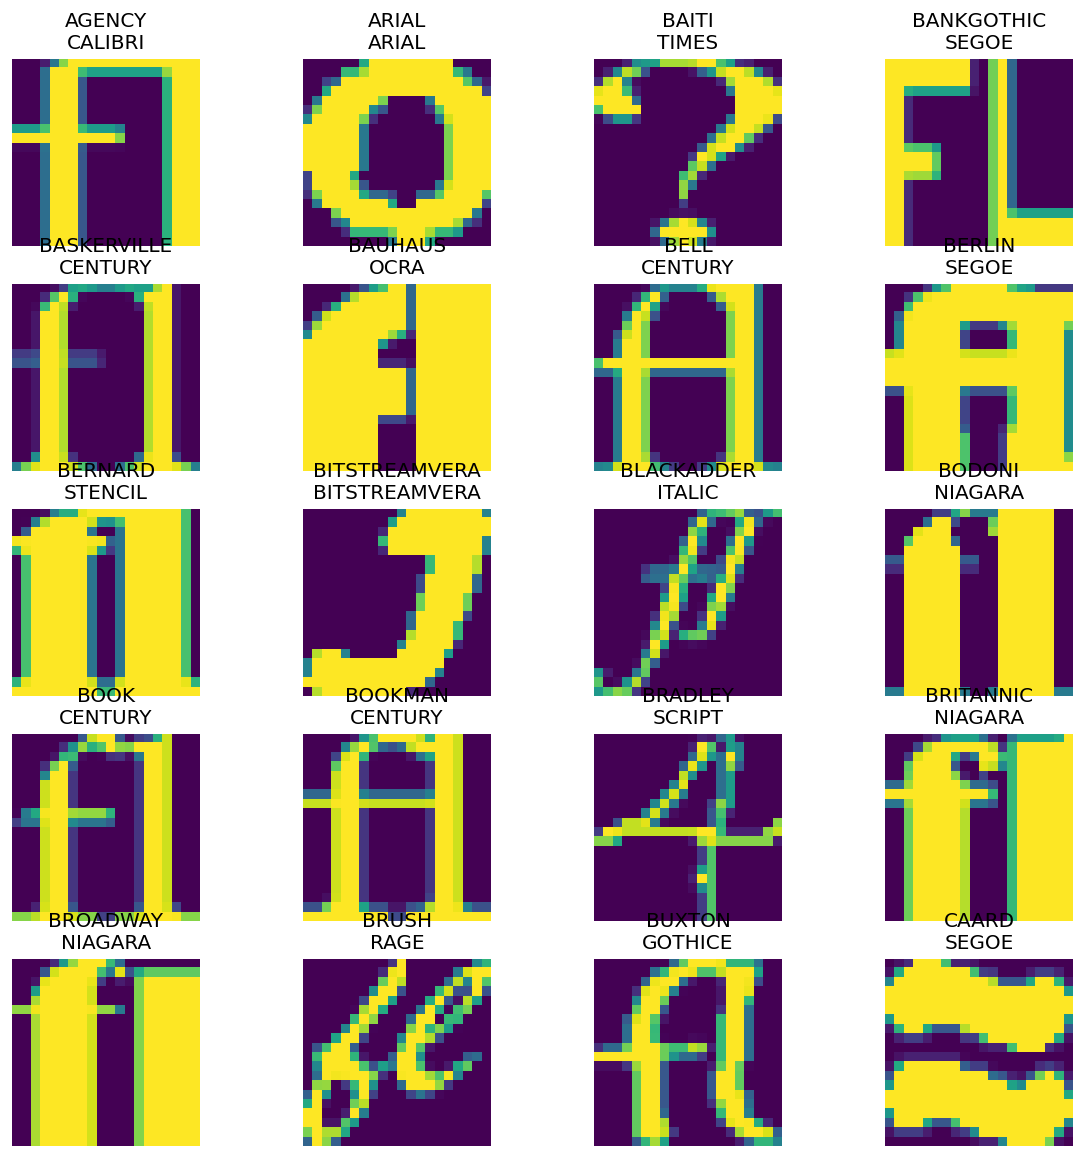

In [ ]:
font_counts = None
for image, font in vis_ds:
  plt.figure(figsize=(12, 12), dpi=120)
  for n in range(20):
    plt.subplot(5,4,n+1)
    plt.imshow(tf.reshape(image[n], (20, 20)))
    plt.axis('off')
    plt.title(decode(font[n], decoding_index) + '\n' +
              decode(model.predict(tf.reshape(image[n], (1, 400))), decoding_index))
  plt.show()

In [ ]:
vis_ds_2 = prepared_ds.skip(800000 // BATCH_SIZE).take(1)

1/1 [==============================] - 0s 19ms/step


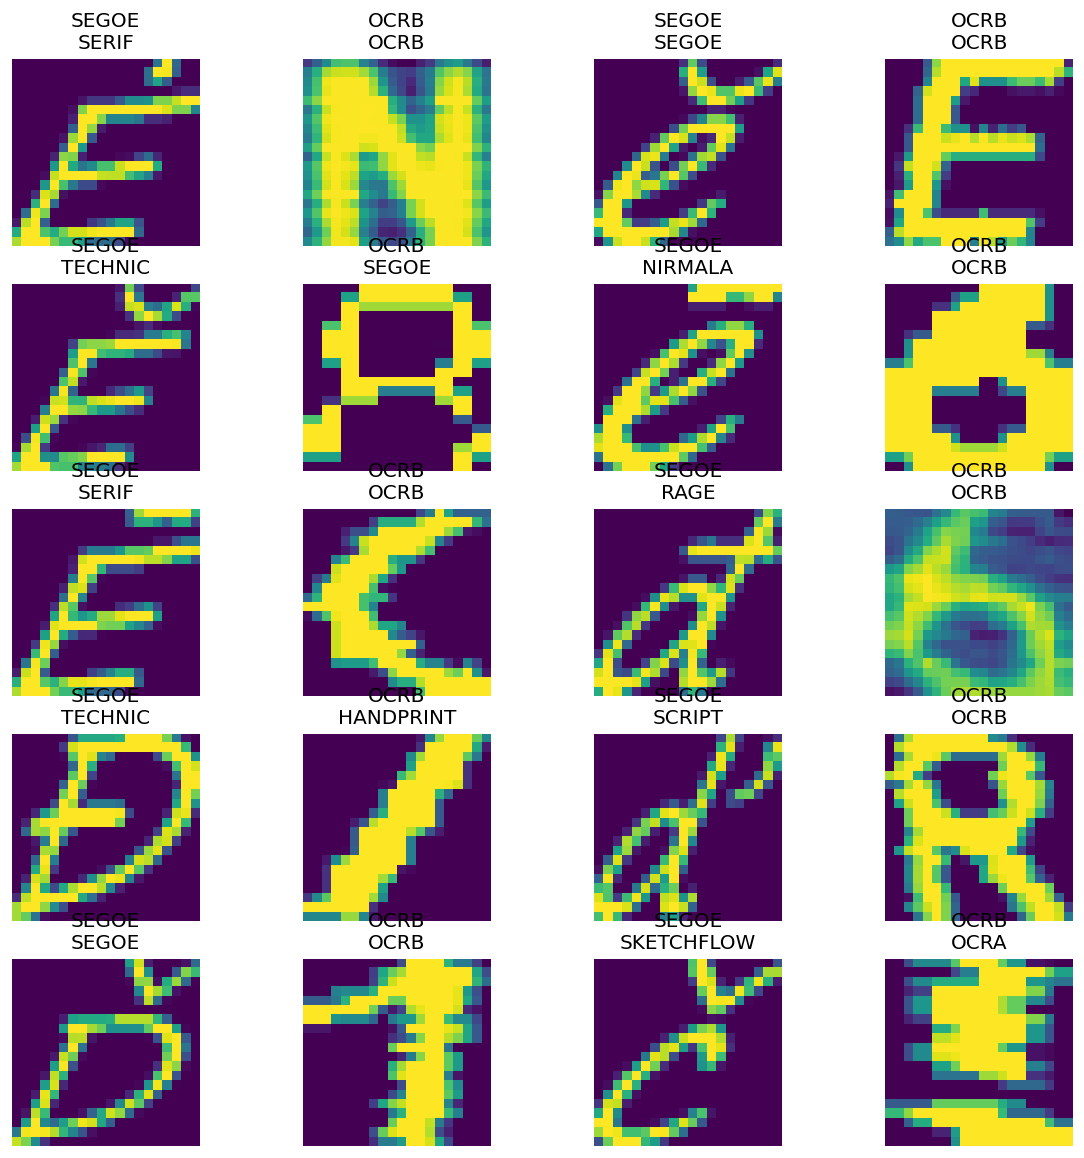

In [ ]:
font_counts = None
for image, font in vis_ds_2:
  plt.figure(figsize=(12, 12), dpi=120)
  for n in range(20):
    plt.subplot(5,4,n+1)
    plt.imshow(tf.reshape(image[n], (20, 20)))
    plt.axis('off')
    plt.title(decode(font[n], decoding_index) + '\n' +
              decode(model.predict(tf.reshape(image[n], (1, 400))), decoding_index))
  plt.show()

In [ ]:
model.save("new_model.h5")